# The aim of the project is to build a fraud detection model using machine learning
# This is the second version of the code and was done as an additional code.
# This version only uses 1 model and the main point here was to build a pipeline

In [1]:
#loading and checking the data
import pandas as pd
data = pd.read_csv("creditcard.csv")


In [2]:
#view the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#check missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Class
0    284315
1       492
Name: count, dtype: int64


Text(0.5, 1.0, 'Fraud transactions vs non-fraud transactions')

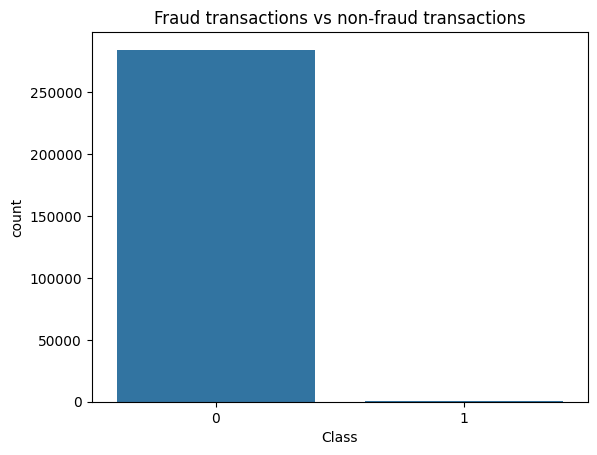

In [5]:
#check for balance
print(data["Class"].value_counts())
import seaborn as sns
sns.countplot(x = "Class", data = data)
import matplotlib.pyplot as plt
plt.title("Fraud transactions vs non-fraud transactions")

In [6]:
#cant see the significance of time, so im removing
data = data.drop(["Time"],axis = 1)

In [7]:
#define the data
x = data.drop(["Class"], axis = 1)
y = data["Class"]

In [8]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state= 42, stratify= y)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#way 2: build a pipeline for preprocessing and training the data 
numeric_column =["Amount"]
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
numeric_transformer = Pipeline(steps = [("scaler", StandardScaler())])
from sklearn.compose import ColumnTransformer
preprocess = ColumnTransformer(transformers=[("num", numeric_transformer, 
                                              numeric_column)])
from sklearn.linear_model import LogisticRegression
clf = Pipeline(steps = [("preprocess", preprocess), 
                        ("classifier", LogisticRegression(class_weight = "balanced", max_iter= 1000))])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:, 1]


In [10]:
#evluate the model
from sklearn.metrics import classification_report,confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89     71079
           1       0.00      0.24      0.00       123

    accuracy                           0.81     71202
   macro avg       0.50      0.53      0.45     71202
weighted avg       1.00      0.81      0.89     71202



# conclusion
# In this version of the fraud detection project,I built a structured pipeline to preprocess the data and train a simple linear regression model.
# A ColumnTransformer was used to apply preprocessing only to the Amount feature
# The model used was Logistic Regression with balanced class weights to handle the class imbalance in the dataset
# The pipeline showed a strong performance in detecting fraud
# Approximately 74% of fraudulent transactions were correctly identified